# Stock Price Prediction Using RNNs

## Objective
The objective of this assignment is to try and predict the stock prices using historical data from four companies IBM (IBM), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).

We use four different companies because they belong to the same sector: Technology. Using data from all four companies may improve the performance of the model. This way, we can capture the broader market sentiment.

The problem statement for this assignment can be summarised as follows:

> Given the stock prices of Amazon, Google, IBM, and Microsoft for a set number of days, predict the stock price of these companies after that window.

## Business Value

Data related to stock markets lends itself well to modeling using RNNs due to its sequential nature. We can keep track of opening prices, closing prices, highest prices, and so on for a long period of time as these values are generated every working day. The patterns observed in this data can then be used to predict the future direction in which stock prices are expected to move. Analyzing this data can be interesting in itself, but it also has a financial incentive as accurate predictions can lead to massive profits.

### **Data Description**

You have been provided with four CSV files corresponding to four stocks: AMZN, GOOGL, IBM, and MSFT. The files contain historical data that were gathered from the websites of the stock markets where these companies are listed: NYSE and NASDAQ. The columns in all four files are identical. Let's take a look at them:

- `Date`: The values in this column specify the date on which the values were recorded. In all four files, the dates range from Jaunary 1, 2006 to January 1, 2018.

- `Open`: The values in this column specify the stock price on a given date when the stock market opens.

- `High`: The values in this column specify the highest stock price achieved by a stock on a given date.

- `Low`: The values in this column specify the lowest stock price achieved by a stock on a given date.

- `Close`: The values in this column specify the stock price on a given date when the stock market closes.

- `Volume`: The values in this column specify the total number of shares traded on a given date.

- `Name`: This column gives the official name of the stock as used in the stock market.

There are 3019 records in each data set. The file names are of the format `\<company_name>_stock_data.csv`.

## **1 Data Loading and Preparation** <font color =red> [25 marks] </font>

#### **Import Necessary Libraries**

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### **1.1 Data Aggregation** <font color =red> [7 marks] </font>

As we are using the stock data for four different companies, we need to create a new DataFrame that contains the combined data from all four data frames. We will create a function that takes in a list of the file names for the four CSV files, and returns a single data frame. This function performs the following tasks:
- Extract stock names from file names
- Read the CSV files as data frames
- Append the stock names into the columns of their respective data frames
- Drop unnecessary columns
- Join the data frames into one.

In [3]:
# Define a function to load data and aggregate them

google = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/RNN_Stocks_Data/GOOGL_stocks_data.csv", index_col='Date', parse_dates=['Date'])
google.head()

Open    High     Low   Close    Volume   Name
Date                                                       
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL

In [4]:
amazon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RNN_Stocks_Data/AMZN_stocks_data.csv', index_col='Date', parse_dates=['Date'])
amazon.head()

Open   High    Low  Close   Volume  Name
Date                                                 
2006-01-03  47.47  47.85  46.25  47.58  7582127  AMZN
2006-01-04  47.48  47.73  46.69  47.25  7440914  AMZN
2006-01-05  47.16  48.20  47.11  47.65  5417258  AMZN
2006-01-06  47.97  48.58  47.32  47.87  6154285  AMZN
2006-01-09  46.55  47.10  46.40  47.08  8945056  AMZN

In [5]:
# Specify the names of the raw data files to be read and use the aggregation function to read the files
microsoft = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RNN_Stocks_Data/MSFT_stocks_data.csv', index_col='Date', parse_dates=['Date'])
microsoft.head()

Open   High    Low  Close     Volume  Name
Date                                                   
2006-01-03  26.25  27.00  26.10  26.84   79974418  MSFT
2006-01-04  26.77  27.08  26.77  26.97   57975661  MSFT
2006-01-05  26.96  27.13  26.91  26.99   48247610  MSFT
2006-01-06  26.89  27.00  26.49  26.91  100969092  MSFT
2006-01-09  26.93  27.07  26.76  26.86   55627836  MSFT

In [6]:
ibm = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RNN_Stocks_Data/IBM_stocks_data.csv', index_col='Date', parse_dates=['Date'])
ibm.head()

Open   High    Low  Close    Volume Name
Date                                                 
2006-01-03  82.45  82.55  80.81  82.06  11715200  IBM
2006-01-04  82.20  82.50  81.33  81.95   9840600  IBM
2006-01-05  81.40  82.90  81.00  82.50   7213500  IBM
2006-01-06  83.95  85.03  83.41  84.95   8197400  IBM
2006-01-09  84.10  84.25  83.38  83.73   6858200  IBM

In [7]:
google.describe()

Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean    428.200802   431.835618   424.130275   428.044001  3.551504e+06
std     236.320026   237.514087   234.923747   236.343238  3.038599e+06
min     131.390000   134.820000   123.770000   128.850000  5.211410e+05
25%     247.775000   250.190000   244.035000   247.605000  1.760854e+06
50%     310.480000   312.810000   307.790000   310.080000  2.517630e+06
75%     572.140000   575.975000   565.900000   570.770000  4.242182e+06
max    1083.020000  1086.490000  1072.270000  1085.090000  4.118289e+07

In [8]:
google.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [9]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [10]:
google.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [11]:
microsoft.describe()
microsoft.columns
microsoft.info()
microsoft.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [12]:
amazon.describe()
amazon.columns
amazon.info()
amazon.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [13]:
ibm.describe()
ibm.columns
ibm.info()
ibm.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3020 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   int64  
 5   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.2+ KB


Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

#### **1.1.2** <font color =red> [2 marks] </font>
Identify and handle any missing values.

In [14]:
ibm.dropna(inplace=True)

In [15]:
ibm.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

### **1.2 Analysis and Visualisation** <font color =red> [5 marks] </font>

#### **1.2.1** <font color =red> [2 marks] </font>
Analyse the frequency distribution of stock volumes of the companies and also see how the volumes vary over time.

In [16]:
fig = px.histogram(google,
                   x='Close',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Close')
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
fig = px.histogram(google,
                   x='Open',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of open')
fig.update_layout(bargap=0.1)
fig.show()

#### **1.2.2** <font color =red> [3 marks] </font>
Analyse correlations between features.

In [18]:
fig = px.scatter(google,
                 x='Open',
                 y='Close',

                 opacity=0.8,

                 title='Open vs. Close')
fig.update_traces(marker_size=5)
fig.show()

There is a very high correlation between "Open" and "Close". As we can see from the scatter plot.

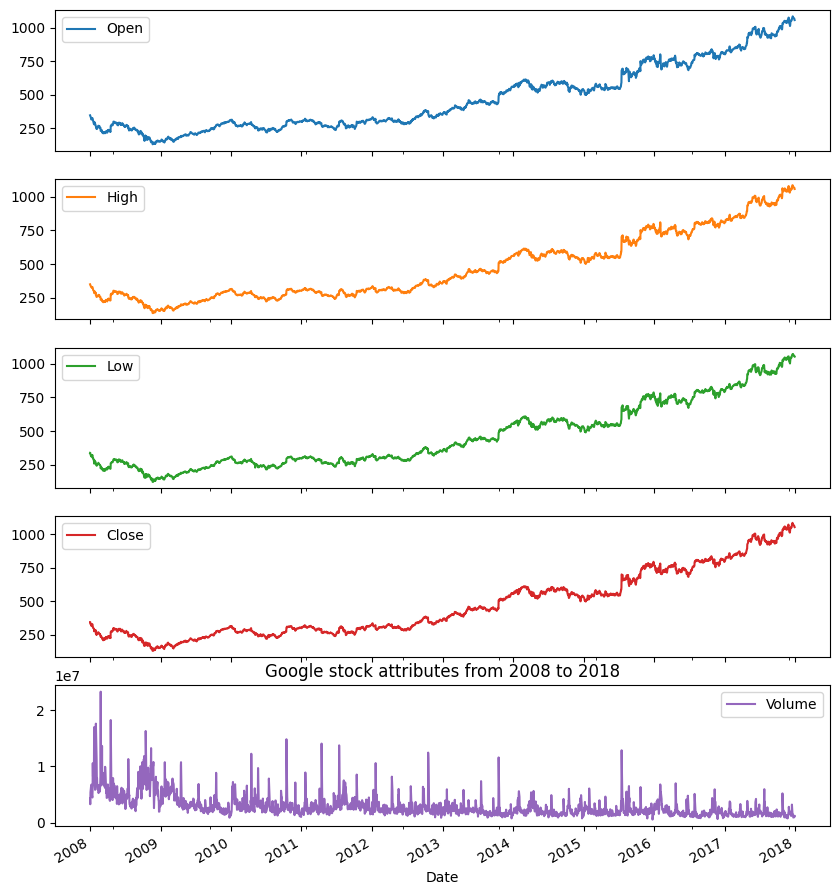

In [19]:
google['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2018')
plt.show()


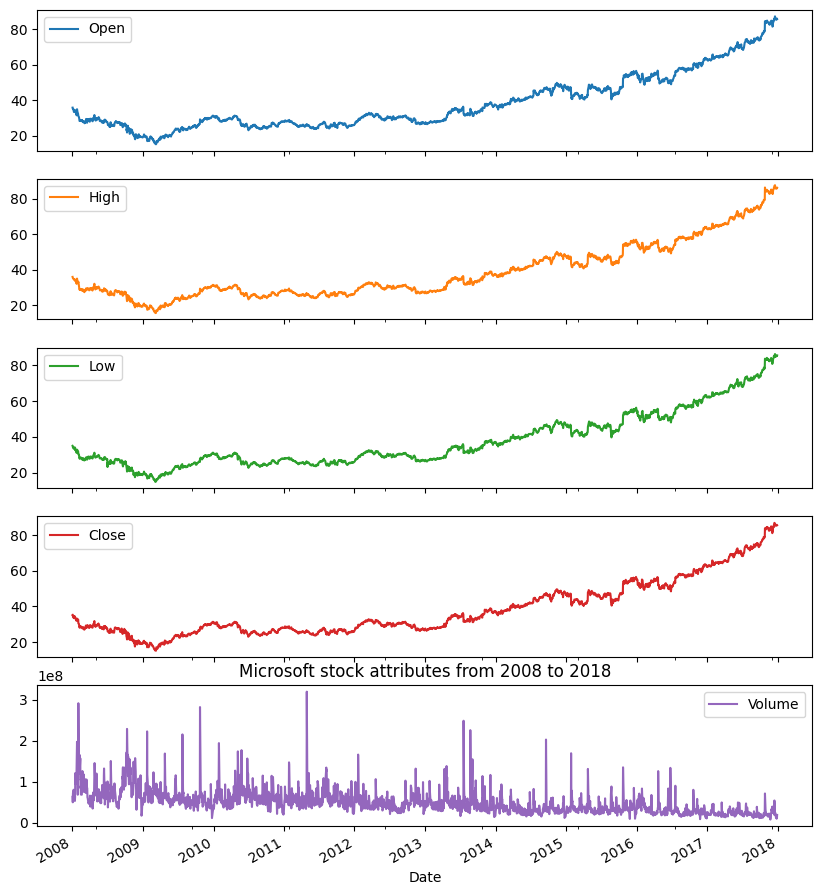

In [20]:
microsoft['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Microsoft stock attributes from 2008 to 2018')
plt.show()

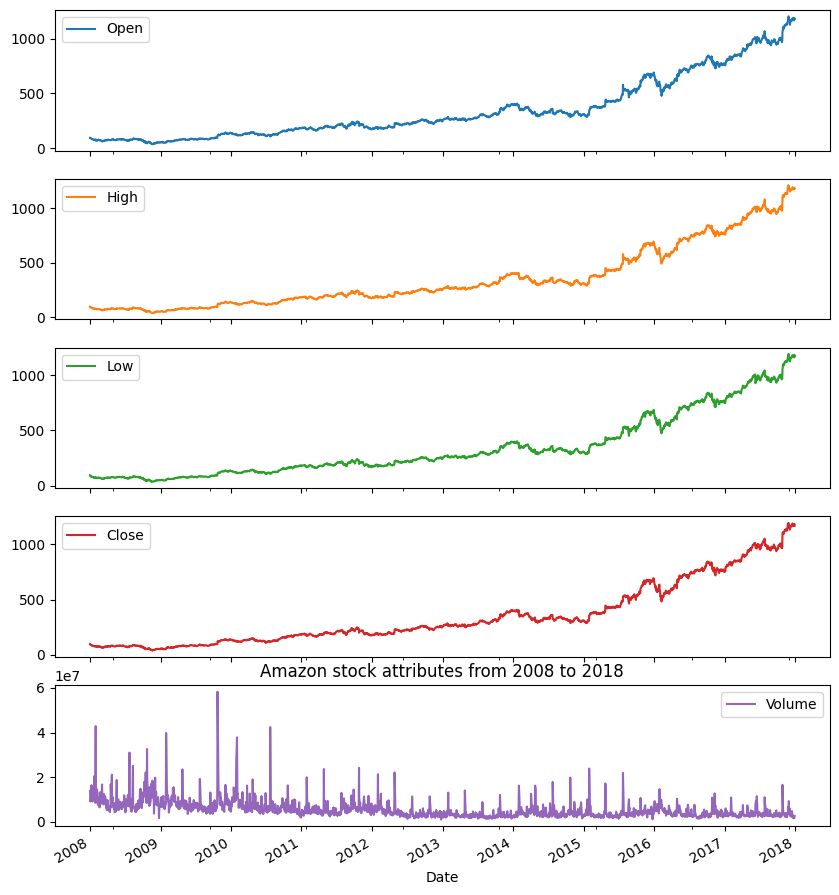

In [21]:
amazon['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Amazon stock attributes from 2008 to 2018')
plt.show()

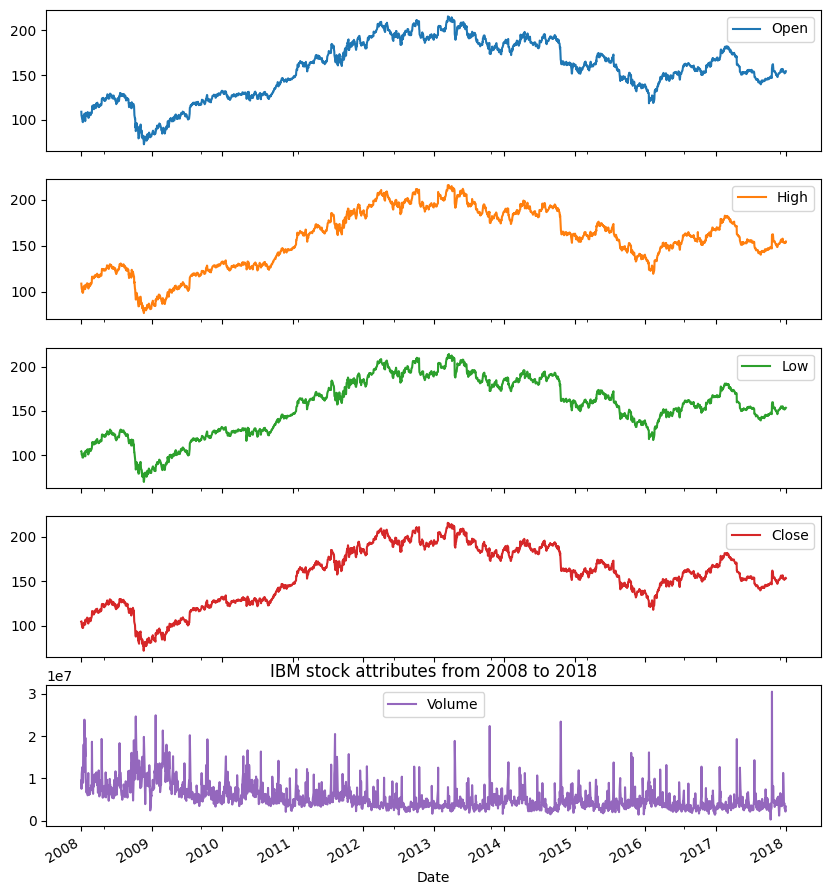

In [22]:
ibm['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('IBM stock attributes from 2008 to 2018')
plt.show()

**High Plot**

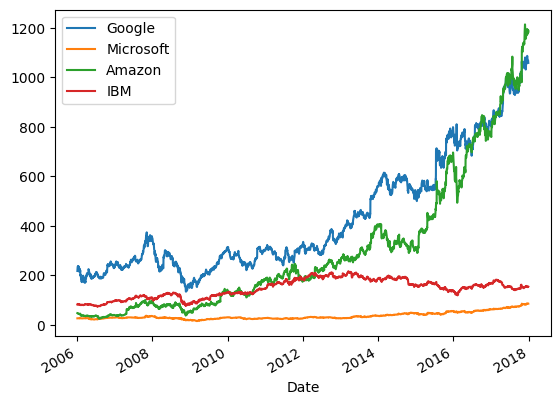

In [23]:
# Plotting before normalization
google.High.plot()
microsoft.High.plot()
amazon.High.plot()
ibm.High.plot()
plt.legend(['Google','Microsoft','Amazon','IBM'])
plt.show()

As we can see here Microsoft's "High" value is very slowly increasing straight line. IBM's "High" value and Amazon's "High" value started from the approx same stage, even Amazon's "High" value was a bit lower but after 2012 Amazon's "High" value started to exponentially increase and slight drop for IBM's "High" value. Since 2016 there is a high fight going between Google's "High" value and Amazon's "High" value at 2018 Amazon's "High" value also beat Google's "High" value.

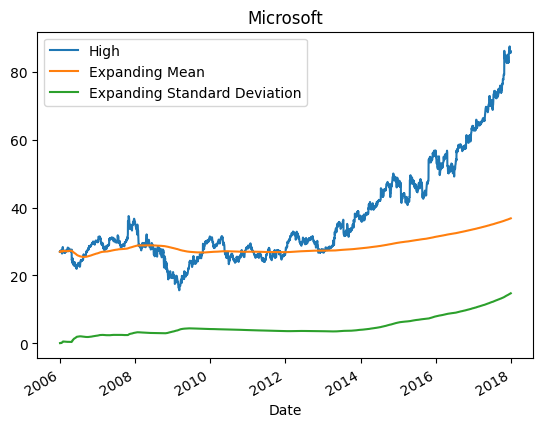

In [24]:

# Expanding window functions
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Microsoft')
plt.show()


In Microsoft data, we can see in 2009 "High" value was under mean for a long time, so we can say there was some loss.

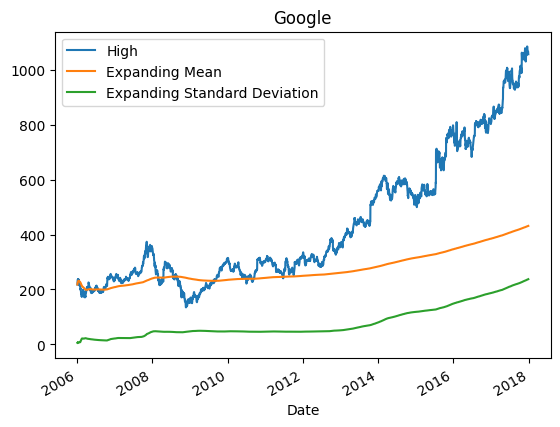

In [25]:
# Expanding window functions
google_mean = google.High.expanding().mean()
google_std = google.High.expanding().std()
google.High.plot()
google_mean.plot()
google_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Google')
plt.show()



Same for Google data, we can see in 2009 "High" value was under mean for a long time, so we can say there was some loss. But it was not an as huge loss as Amazon.

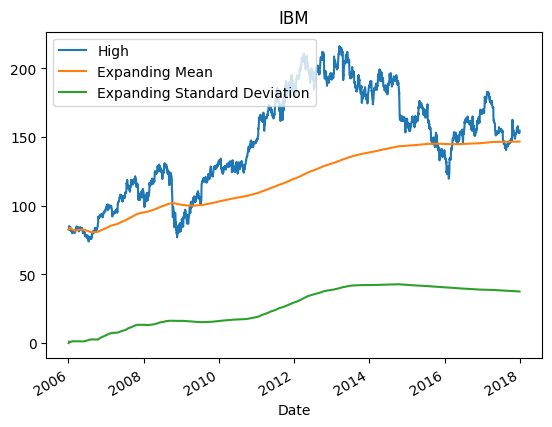

In [26]:
# Expanding window functions
ibm_mean = ibm.High.expanding().mean()
ibm_std = ibm.High.expanding().std()
ibm.High.plot()
ibm_mean.plot()
ibm_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('IBM')
plt.show()


Same for IBM data, we can see in 2009 "High" value was under mean for a long time, so we can say there was some loss. And after 2013 again a drop then in 2016 there was a huge loss but after that, they were doing well. After just some profit again in between 2017, there was another drop.

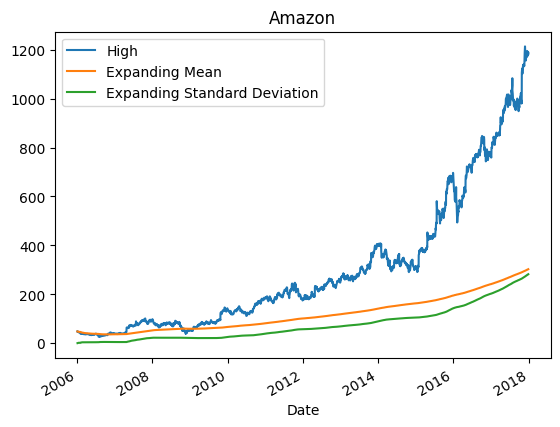

In [27]:
# Expanding window functions
amazon_mean = amazon.High.expanding().mean()
amazon_std = amazon.High.expanding().std()
amazon.High.plot()
amazon_mean.plot()
amazon_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Amazon')
plt.show()

For Amazon's "High" value the case is different they also face loss in 2009 but for a very little margin. And after that their growth is in exponential order.

Here we can see every company faced a loss in 2009, maybe that's because of the economic slowdown.

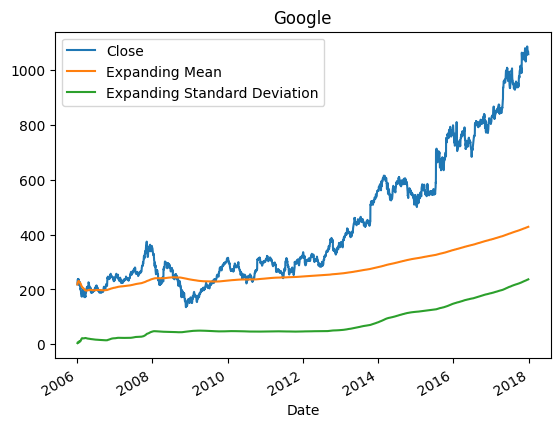

In [28]:
# Expanding window functions
google_mean = google.Close.expanding().mean()
google_std = google.Close.expanding().std()
google.High.plot()
google_mean.plot()
google_std.plot()
plt.legend(['Close','Expanding Mean','Expanding Standard Deviation'])
plt.title('Google')
plt.show()

In [29]:
from pylab import rcParams
import statsmodels.api as sm


Trend and Seasonality of Google Data

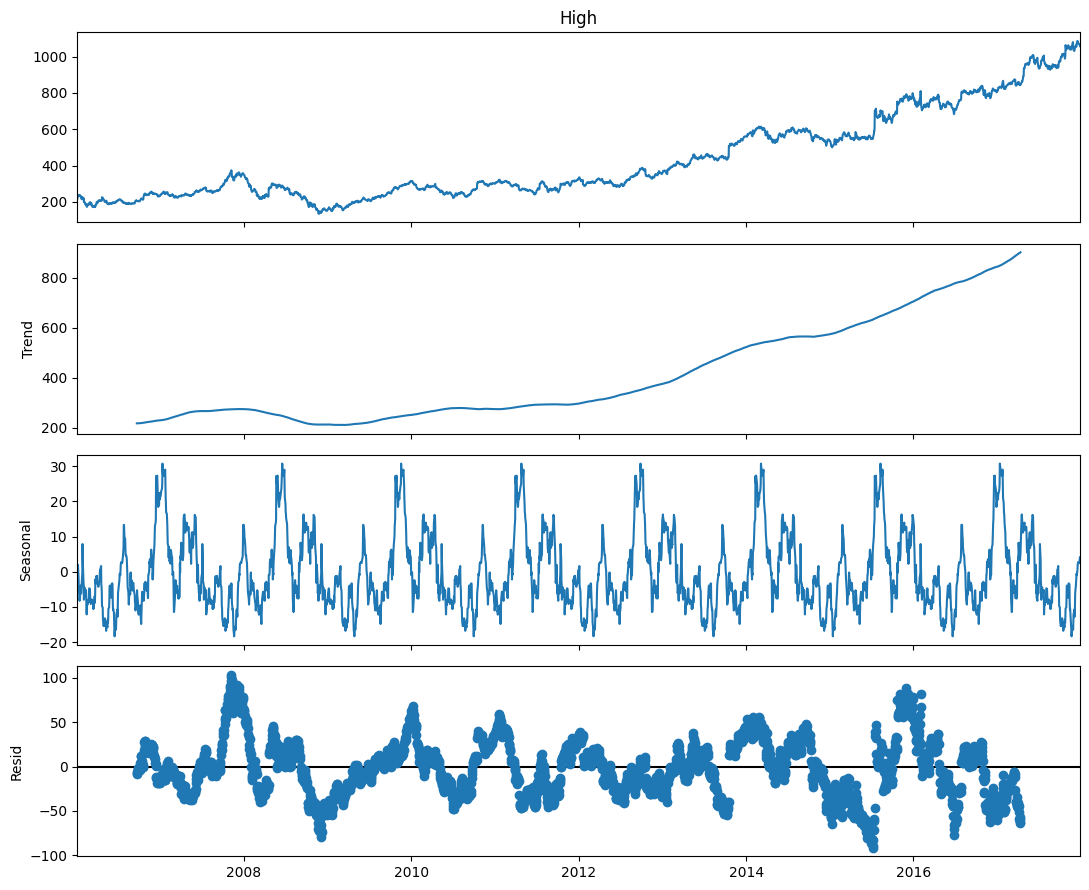

In [30]:
# Now, for decomposition...

rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"],period=360) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

There is a very slow increasing trend until 2012, but after 2012 there was an exponential high trend. And very high seasonality.

Microsoft data

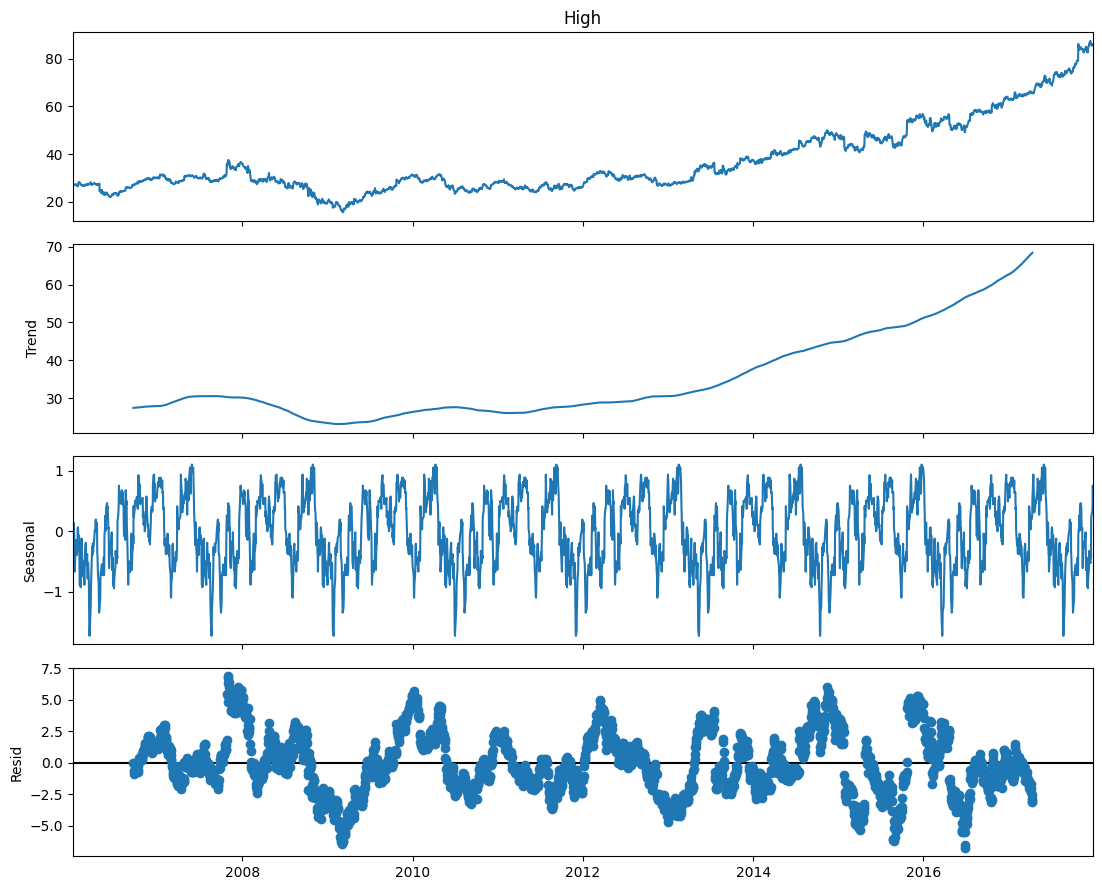

In [31]:
rcParams['figure.figsize'] = 11, 9
decomposed_microsoft_volume = sm.tsa.seasonal_decompose(microsoft["High"],period=360) # The frequncy is annual
figure = decomposed_microsoft_volume.plot()
plt.show()

Same for Microsoft data, there is a very slow increasing trend until 2012, but after 2012 there was an exponential high trend. And very high seasonality.

IBM data

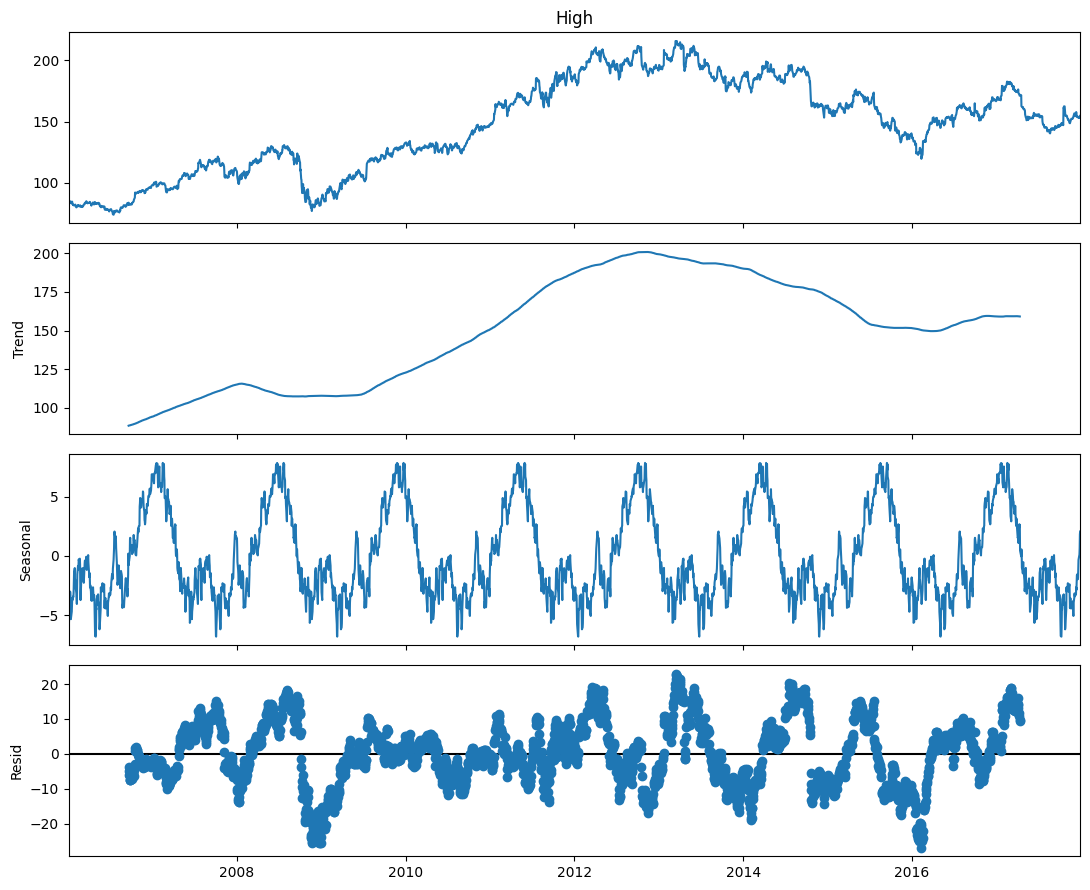

In [32]:
rcParams['figure.figsize'] = 11, 9
decomposed_ibm_volume = sm.tsa.seasonal_decompose(ibm["High"],period=360) # The frequncy is annual
figure = decomposed_ibm_volume.plot()
plt.show()

IBM data has a very slow increasing trend until 2008, but after 2009 there was an exponential high trend until 2013, then a high drop until 2016 then a very slow increasing trend. And very high seasonality.

Amazon data

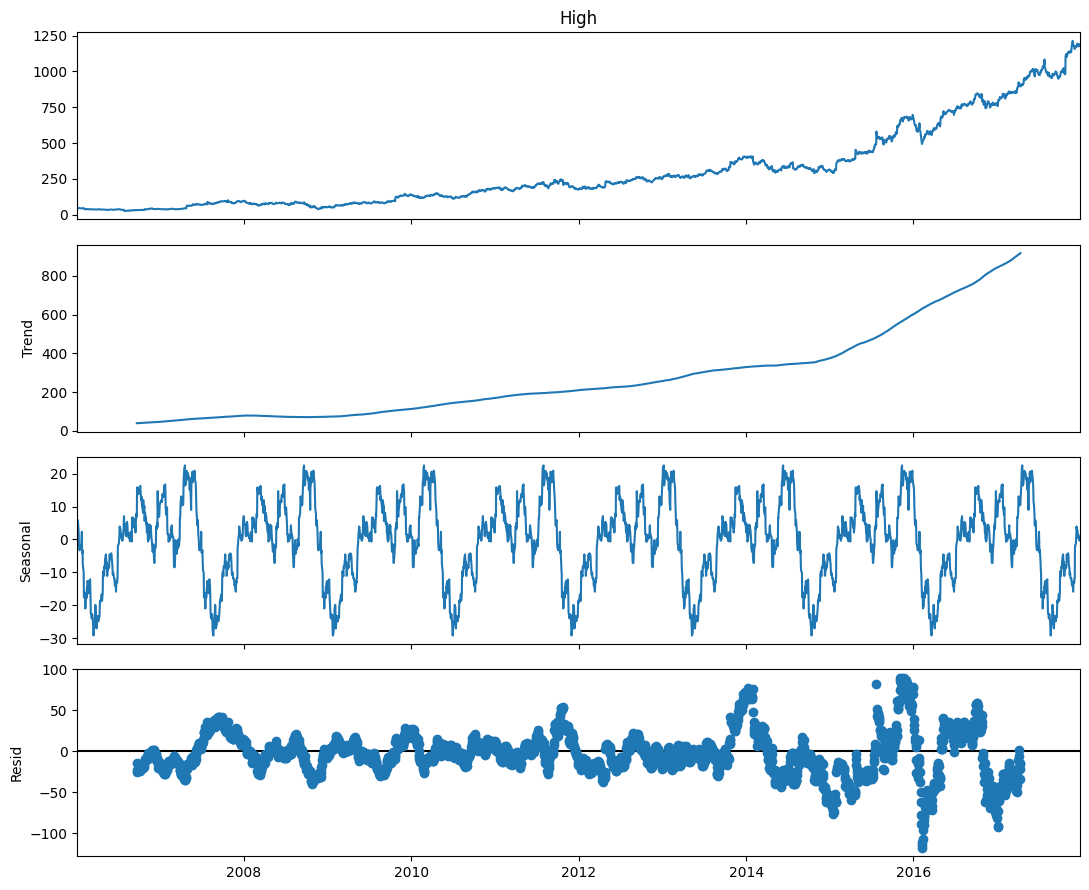

In [33]:
rcParams['figure.figsize'] = 11, 9
decomposed_amazon_volume = sm.tsa.seasonal_decompose(amazon["High"],period=360) # The frequncy is annual
figure = decomposed_amazon_volume.plot()
plt.show()

Amazon data is similar to Google data.

Close

Google

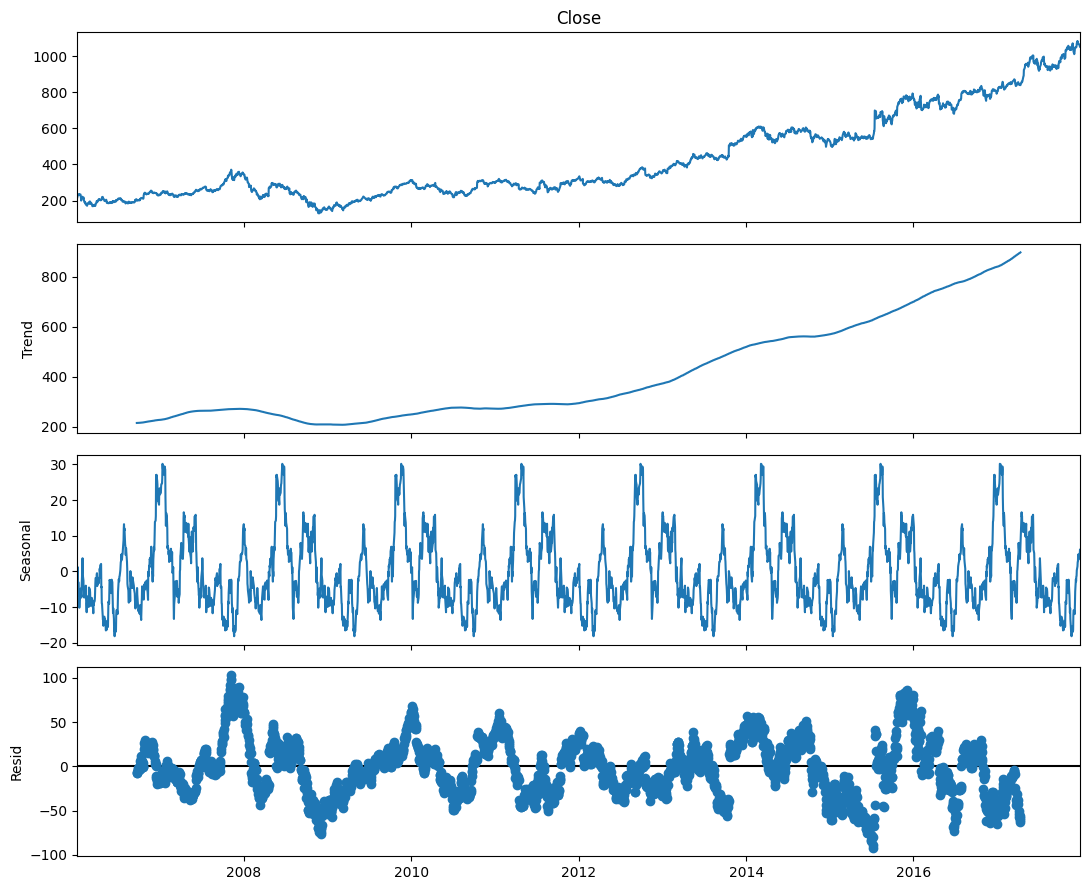

In [70]:

rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["Close"],period=360) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

Microsof

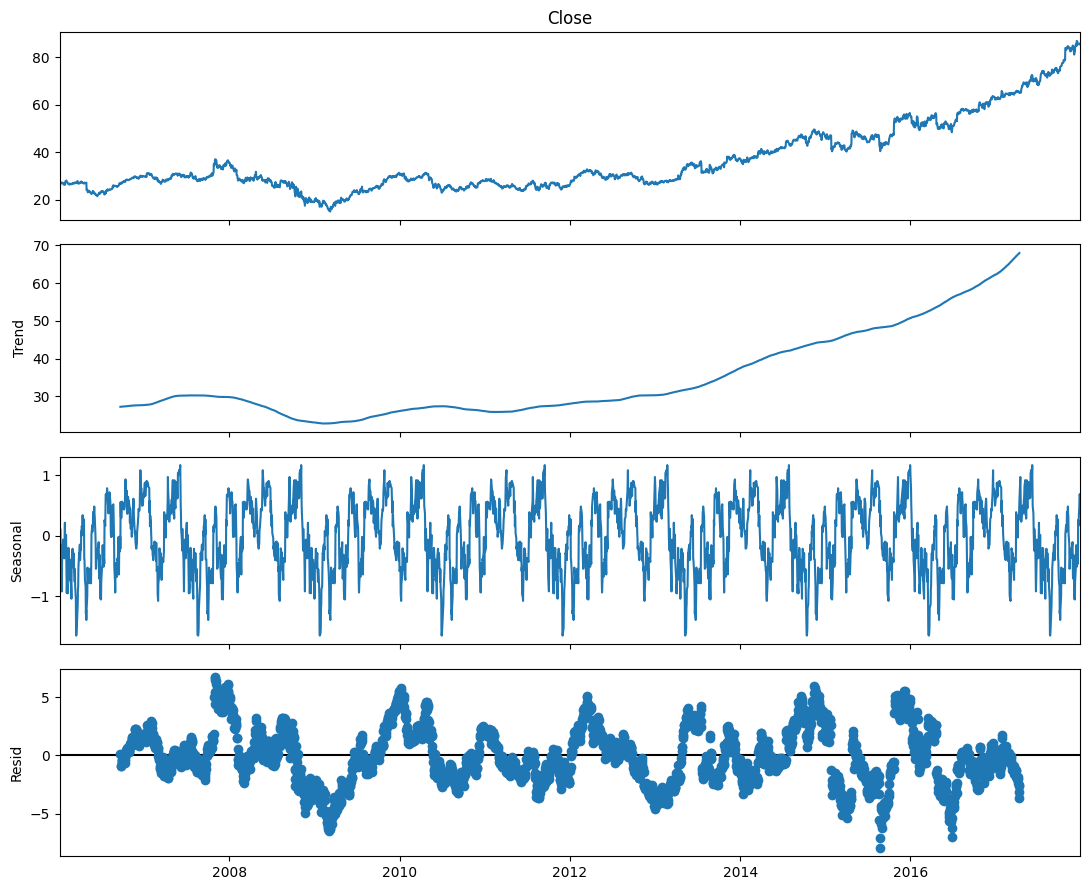

In [72]:
rcParams['figure.figsize'] = 11, 9
decomposed_microsoft_volume = sm.tsa.seasonal_decompose(microsoft["Close"],period=360) # The frequncy is annual
figure = decomposed_microsoft_volume.plot()
plt.show()

Amazon

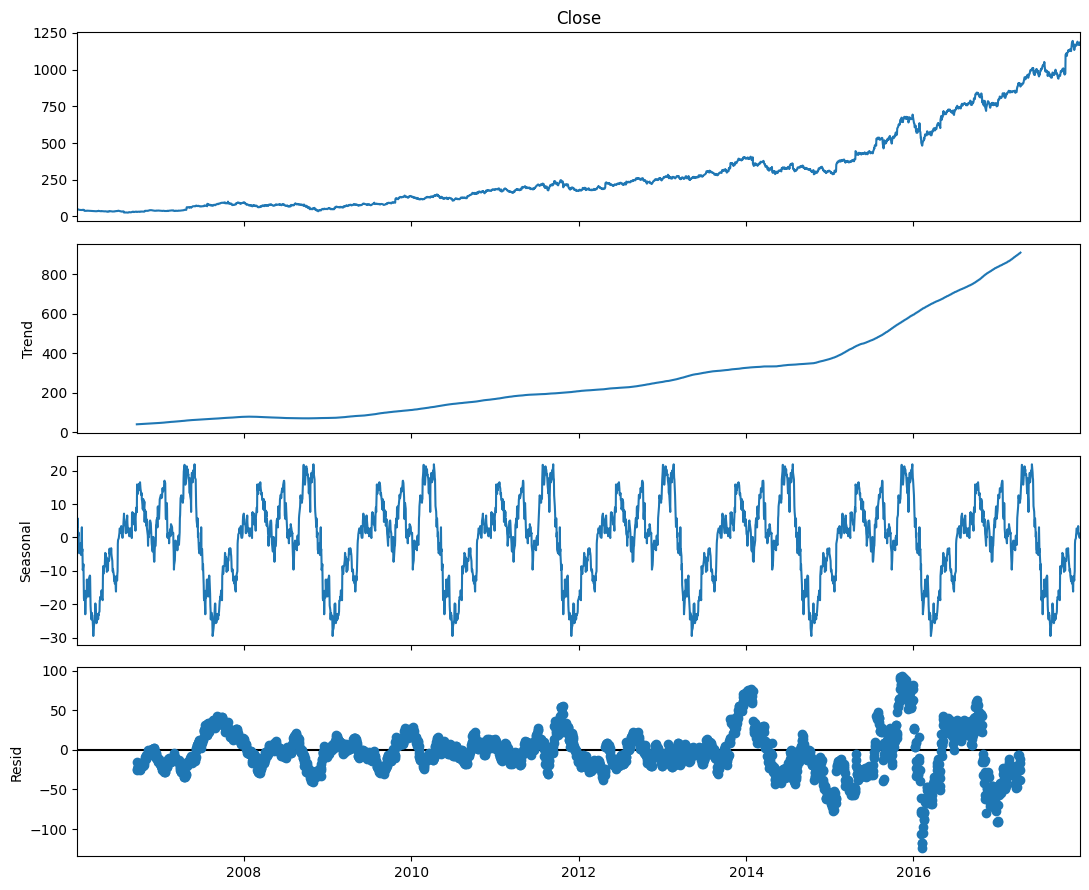

In [74]:
rcParams['figure.figsize'] = 11, 9
decomposed_amazon_volume = sm.tsa.seasonal_decompose(amazon["Close"],period=360) # The frequncy is annual
figure = decomposed_amazon_volume.plot()
plt.show()

IBM

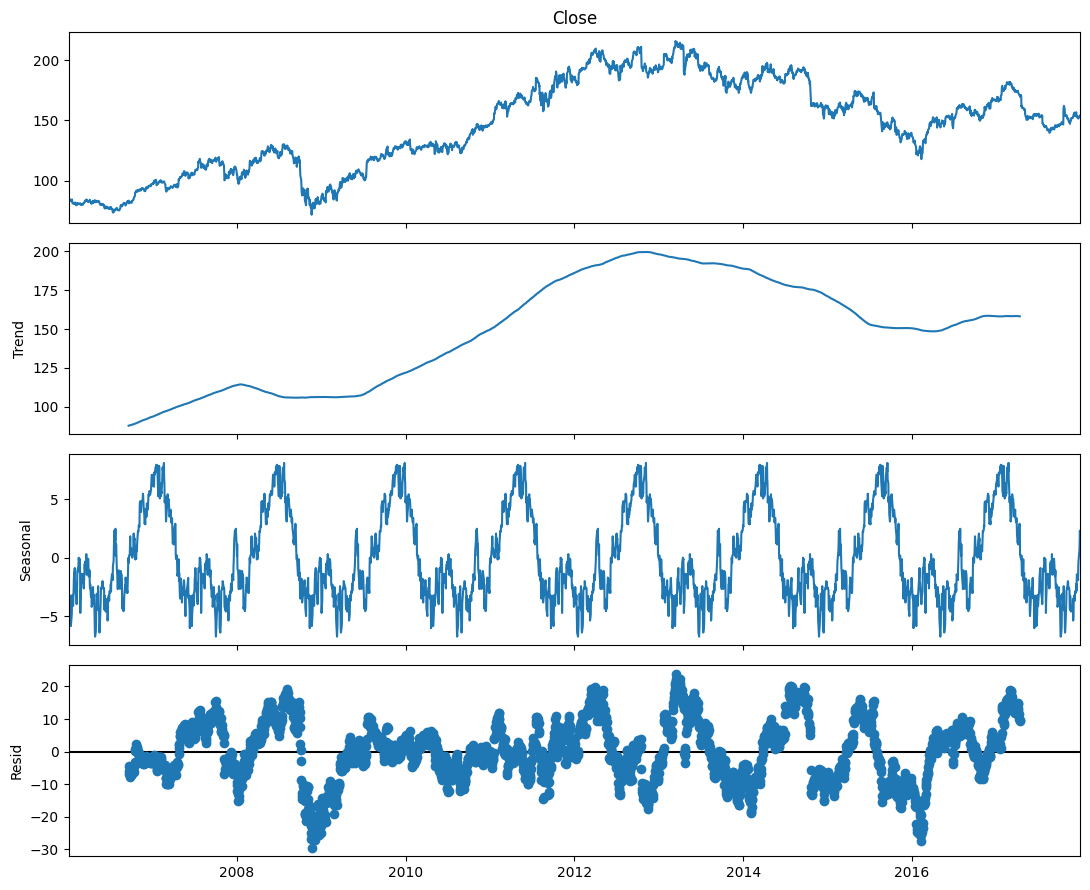

In [76]:

rcParams['figure.figsize'] = 11, 9
decomposed_ibm_volume = sm.tsa.seasonal_decompose(ibm["Close"],period=360) # The frequncy is annual
figure = decomposed_ibm_volume.plot()
plt.show()

Because there have a very strong correlation between Close and High, we can see the trend and seasonality is very similar.



It is worth noting that every training session for a neural network is unique. So, the results may vary slightly each time you retrain the model.

In [51]:
# Compute the performance of the model on the testing data set



### **2.2 Advanced RNN Models** <font color =red> [10 marks] </font>

In [79]:
filepath = '/content/drive/MyDrive/Colab Notebooks/RNN_Stocks_Data/AMZN_stocks_data.csv'
data_amazon = pd.read_csv(filepath)
data_amazon = data_amazon.sort_values('Date')
data_amazon.head()


Date   Open   High    Low  Close   Volume  Name
0  2006-01-03  47.47  47.85  46.25  47.58  7582127  AMZN
1  2006-01-04  47.48  47.73  46.69  47.25  7440914  AMZN
2  2006-01-05  47.16  48.20  47.11  47.65  5417258  AMZN
3  2006-01-06  47.97  48.58  47.32  47.87  6154285  AMZN
4  2006-01-09  46.55  47.10  46.40  47.08  8945056  AMZN

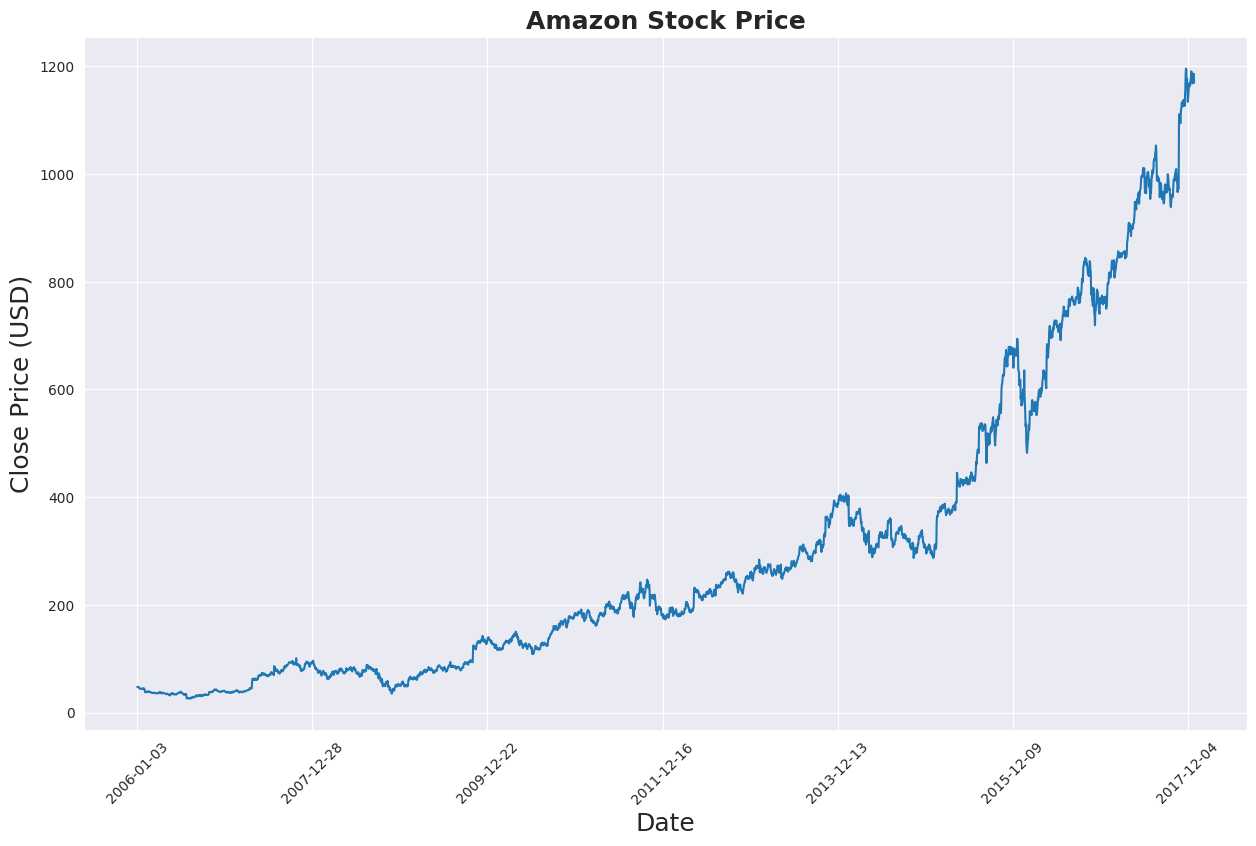

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_amazon[['Close']])
plt.xticks(range(0,data_amazon.shape[0],500),data_amazon['Date'].loc[::500],rotation=45)
plt.title("Amazon Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [81]:
filepath = '/content/drive/MyDrive/Colab Notebooks/RNN_Stocks_Data/GOOGL_stocks_data.csv'
data_google = pd.read_csv(filepath)
data_google = data_google.sort_values('Date')
data_google.head()

Date    Open    High     Low   Close    Volume   Name
0  2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
1  2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2  2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
3  2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
4  2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL

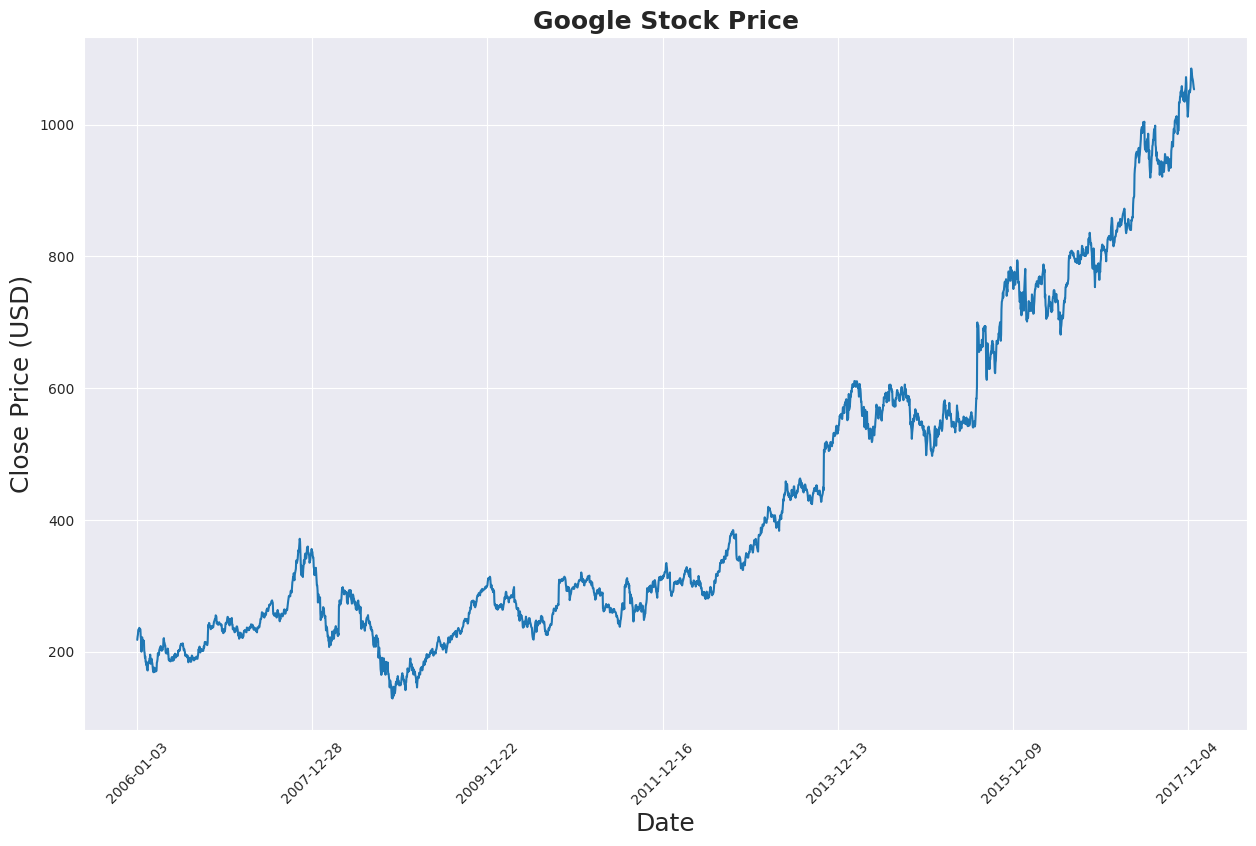

In [82]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_google[['Close']])
plt.xticks(range(0,data_google.shape[0],500),data_google['Date'].loc[::500],rotation=45)
plt.title("Google Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [83]:
filepath = '/content/drive/MyDrive/Colab Notebooks/RNN_Stocks_Data/IBM_stocks_data.csv'
data_ibm = pd.read_csv(filepath)
data_ibm = data_ibm.sort_values('Date')
data_ibm.head()

Date   Open   High    Low  Close    Volume Name
0  2006-01-03  82.45  82.55  80.81  82.06  11715200  IBM
1  2006-01-04  82.20  82.50  81.33  81.95   9840600  IBM
2  2006-01-05  81.40  82.90  81.00  82.50   7213500  IBM
3  2006-01-06  83.95  85.03  83.41  84.95   8197400  IBM
4  2006-01-09  84.10  84.25  83.38  83.73   6858200  IBM

In [84]:
data_ibm.dropna(inplace=True)

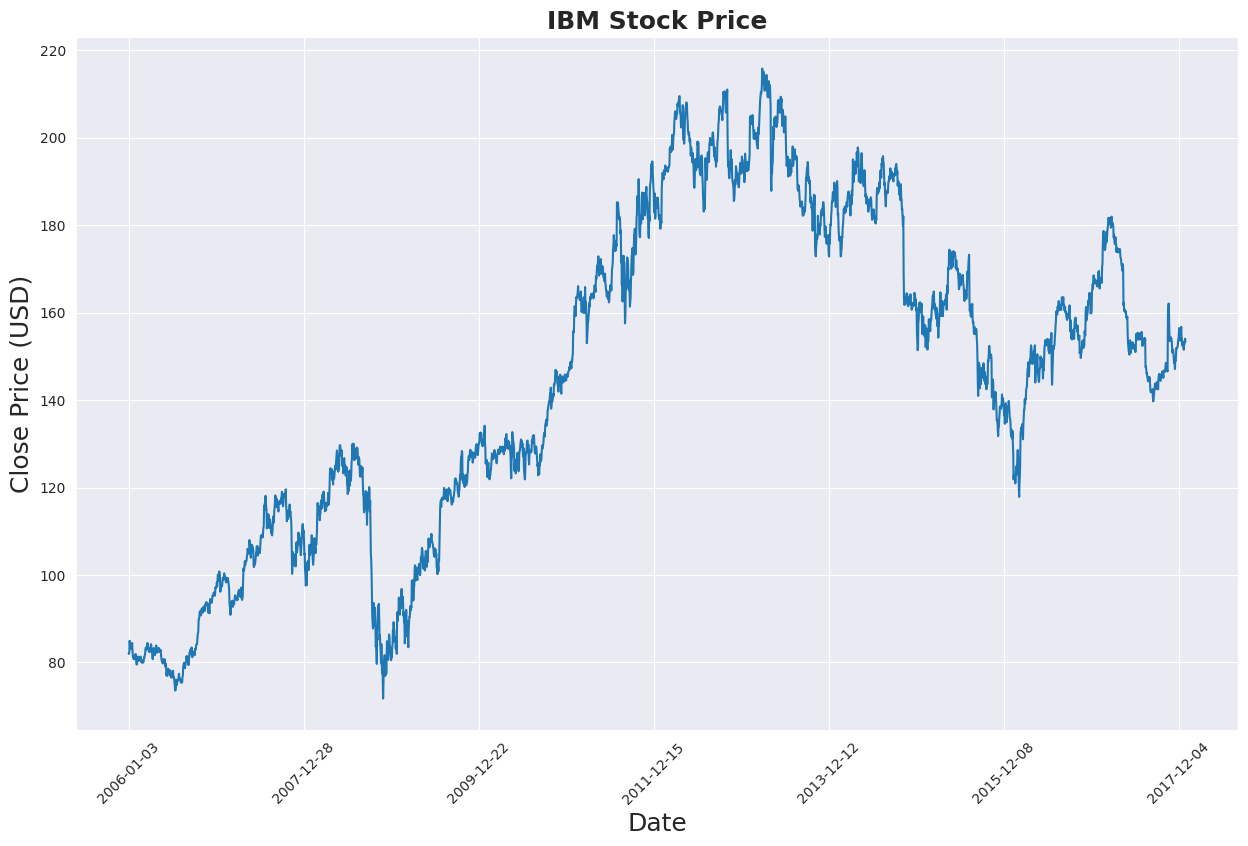

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_ibm[['Close']])
plt.xticks(range(0,data_ibm.shape[0],500),data_ibm['Date'].loc[::500],rotation=45)
plt.title("IBM Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [86]:
filepath = '/content/drive/MyDrive/Colab Notebooks/RNN_Stocks_Data/MSFT_stocks_data.csv'
data_microsoft = pd.read_csv(filepath)
data_microsoft = data_microsoft.sort_values('Date')
data_microsoft.head()

Date   Open   High    Low  Close     Volume  Name
0  2006-01-03  26.25  27.00  26.10  26.84   79974418  MSFT
1  2006-01-04  26.77  27.08  26.77  26.97   57975661  MSFT
2  2006-01-05  26.96  27.13  26.91  26.99   48247610  MSFT
3  2006-01-06  26.89  27.00  26.49  26.91  100969092  MSFT
4  2006-01-09  26.93  27.07  26.76  26.86   55627836  MSFT

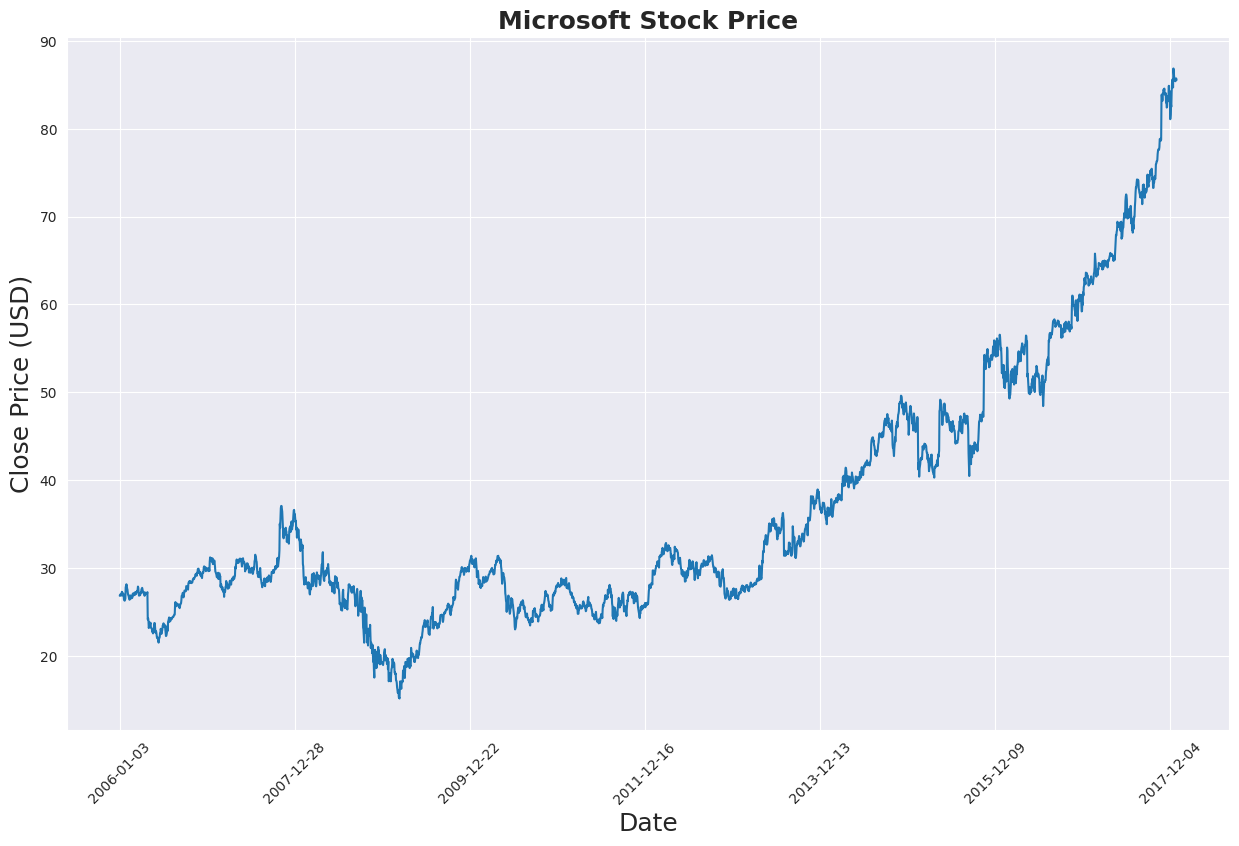

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_microsoft[['Close']])
plt.xticks(range(0,data_microsoft.shape[0],500),data_microsoft['Date'].loc[::500],rotation=45)
plt.title("Microsoft Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [88]:
price_amazon = data_amazon[['Close']]
price_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 23.7 KB


In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_amazon['Close'] = scaler.fit_transform(price_amazon['Close'].values.reshape(-1,1))

<ipython-input-89-aa33d90e1d28>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### **1.3 Data Processing** <font color =red> [13 marks] </font>

Next, we need to process the data so that it is ready to be used in recurrent neural networks. You know RNNs are suitable to work with sequential data where patterns repeat at regular intervals.

For this, we need to execute the following steps:
1. Create windows from the master data frame and obtain windowed `X` and corresponding windowed `y` values
2. Perform train-test split on the windowed data
3. Scale the data sets in an appropriate manner

We will define functions for the above steps that finally return training and testing data sets that are ready to be used in recurrent neural networks.

From the main DataFrame, this function will create windowed DataFrames, and store those as a list of DataFrames.

Controllable parameters will be window size, step size (window stride length) and target names as a list of the names of stocks whose closing values we wish to predict.

#### **1.3.1** <font color =red> [3 marks] </font>
Create a function that returns the windowed `X` and `y` data.

In [91]:
# # Define a function to create a model and specify default values for hyperparameters
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []

    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])

    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]

    return [x_train, y_train, x_test, y_test]



In [92]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_amazon, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)


x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In this section, we will:
- Create an LSTM or a GRU network
- Tune the network for different hyperparameter values
- View the performance of the optimal model on the test data

In [93]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

By using GRU time series forecasting we will forcaste and check.

In [94]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [95]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [96]:

model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [98]:
import time
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.4726802706718445
Epoch  1 MSE:  0.14590193331241608
Epoch  2 MSE:  0.029087230563163757
Epoch  3 MSE:  0.10396461188793182
Epoch  4 MSE:  0.07651519775390625
Epoch  5 MSE:  0.03229746222496033
Epoch  6 MSE:  0.033728115260601044
Epoch  7 MSE:  0.052615948021411896
Epoch  8 MSE:  0.059542588889598846
Epoch  9 MSE:  0.05124906450510025
Epoch  10 MSE:  0.03713557869195938
Epoch  11 MSE:  0.027130328118801117
Epoch  12 MSE:  0.026417458429932594
Epoch  13 MSE:  0.0323357991874218
Epoch  14 MSE:  0.03639990836381912
Epoch  15 MSE:  0.03362372890114784
Epoch  16 MSE:  0.02677568607032299
Epoch  17 MSE:  0.02129501849412918
Epoch  18 MSE:  0.019912580028176308
Epoch  19 MSE:  0.021566538140177727
Epoch  20 MSE:  0.023204755038022995
Epoch  21 MSE:  0.022359078750014305
Epoch  22 MSE:  0.018871964886784554
Epoch  23 MSE:  0.014761511236429214
Epoch  24 MSE:  0.012531113810837269
Epoch  25 MSE:  0.012930091470479965
Epoch  26 MSE:  0.013818517327308655
Epoch  27 MSE:  0.0122533

In [99]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

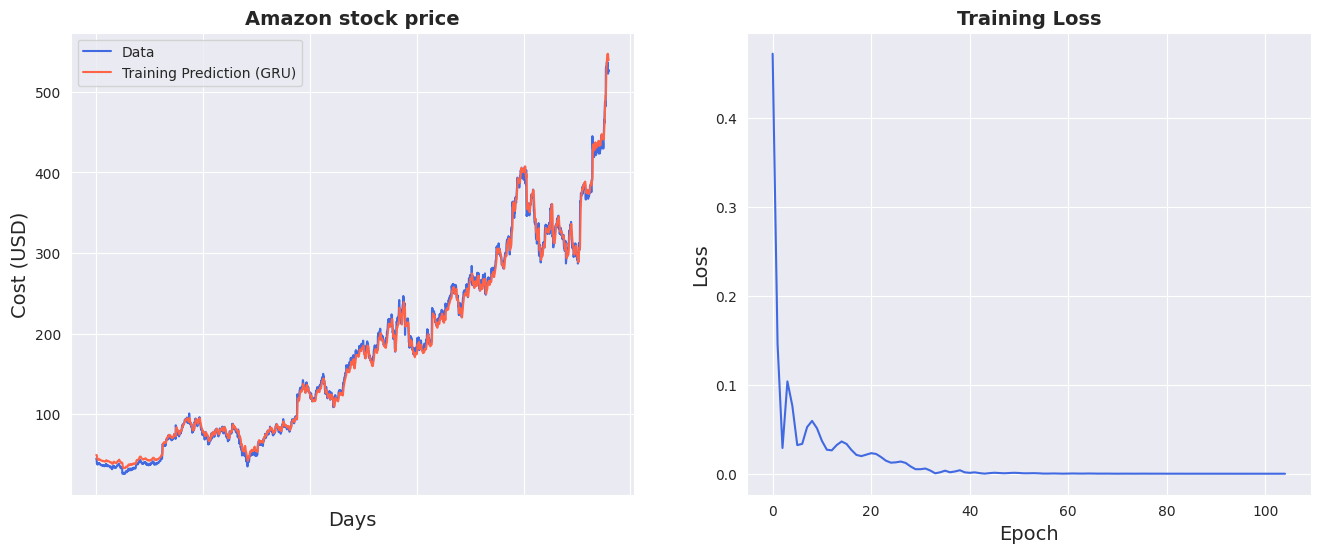

In [100]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Amazon stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [101]:


import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 6.21 RMSE
Test Score: 32.72 RMSE


In [102]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_amazon)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_amazon)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_amazon)-1, :] = y_test_pred

original = scaler.inverse_transform(price_amazon['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [103]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Amazon Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

Google

In [106]:
price_google = data_google[['Close']]
price_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 23.7 KB


In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_google['Close'] = scaler.fit_transform(price_google['Close'].values.reshape(-1,1))

<ipython-input-107-7909ce3880b7>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_google, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [109]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)


In [110]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [111]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.4154220521450043
Epoch  1 MSE:  0.17746956646442413
Epoch  2 MSE:  0.0571676604449749
Epoch  3 MSE:  0.1195635050535202
Epoch  4 MSE:  0.0781746655702591
Epoch  5 MSE:  0.044386155903339386
Epoch  6 MSE:  0.057147059589624405
Epoch  7 MSE:  0.07062482833862305
Epoch  8 MSE:  0.06402774900197983
Epoch  9 MSE:  0.04494750499725342
Epoch  10 MSE:  0.02892756648361683
Epoch  11 MSE:  0.02733897604048252
Epoch  12 MSE:  0.035202521830797195
Epoch  13 MSE:  0.03338135778903961
Epoch  14 MSE:  0.018710283562541008
Epoch  15 MSE:  0.006749189458787441
Epoch  16 MSE:  0.00753204757347703
Epoch  17 MSE:  0.01419852115213871
Epoch  18 MSE:  0.012603294104337692
Epoch  19 MSE:  0.004158793482929468
Epoch  20 MSE:  0.003771885298192501
Epoch  21 MSE:  0.011328593827784061
Epoch  22 MSE:  0.01083836704492569
Epoch  23 MSE:  0.003648417303338647
Epoch  24 MSE:  0.0007353934342972934
Epoch  25 MSE:  0.0032677275594323874
Epoch  26 MSE:  0.00583915738388896
Epoch  27 MSE:  0.0053883302

In [112]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))


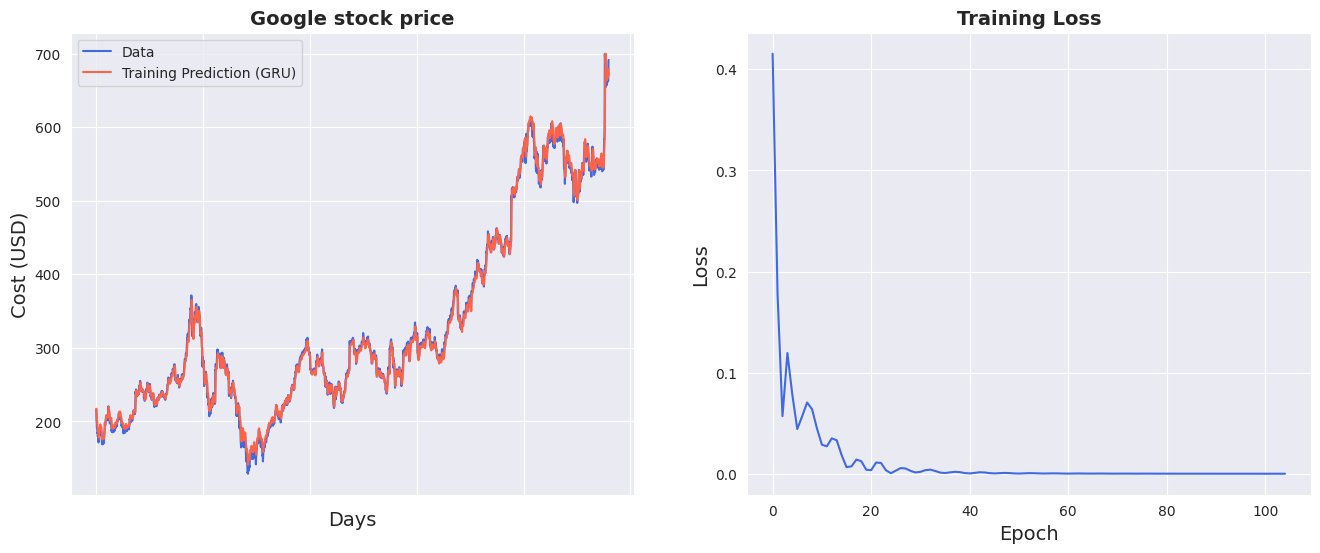

In [113]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Google stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [114]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 7.39 RMSE
Test Score: 23.89 RMSE


In [115]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_google)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_google)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_google)-1, :] = y_test_pred

original = scaler.inverse_transform(price_google['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [116]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Google Stock Result',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

IBM

In [117]:
price_ibm = data_ibm[['Close']]
price_ibm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3019 entries, 0 to 3019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 47.2 KB


In [118]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_ibm['Close'] = scaler.fit_transform(price_ibm['Close'].values.reshape(-1,1))

<ipython-input-118-9915b8518dae>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_ibm, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [120]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [121]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [122]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [123]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))


Epoch  0 MSE:  0.35053351521492004
Epoch  1 MSE:  0.253282368183136
Epoch  2 MSE:  0.16441990435123444
Epoch  3 MSE:  0.0665806457400322
Epoch  4 MSE:  0.009375547990202904
Epoch  5 MSE:  0.09887474030256271
Epoch  6 MSE:  0.042375195771455765
Epoch  7 MSE:  0.004194006789475679
Epoch  8 MSE:  0.010105417110025883
Epoch  9 MSE:  0.027912264689803123
Epoch  10 MSE:  0.03827290236949921
Epoch  11 MSE:  0.03740246593952179
Epoch  12 MSE:  0.028825655579566956
Epoch  13 MSE:  0.016889935359358788
Epoch  14 MSE:  0.00592030817642808
Epoch  15 MSE:  0.0014131853822618723
Epoch  16 MSE:  0.006192855536937714
Epoch  17 MSE:  0.014288932085037231
Epoch  18 MSE:  0.016885489225387573
Epoch  19 MSE:  0.012324754148721695
Epoch  20 MSE:  0.005366603843867779
Epoch  21 MSE:  0.0015029188944026828
Epoch  22 MSE:  0.0020448658615350723
Epoch  23 MSE:  0.004726971033960581
Epoch  24 MSE:  0.007195740472525358
Epoch  25 MSE:  0.008244320750236511
Epoch  26 MSE:  0.0074715400114655495
Epoch  27 MSE:  0.

In [124]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

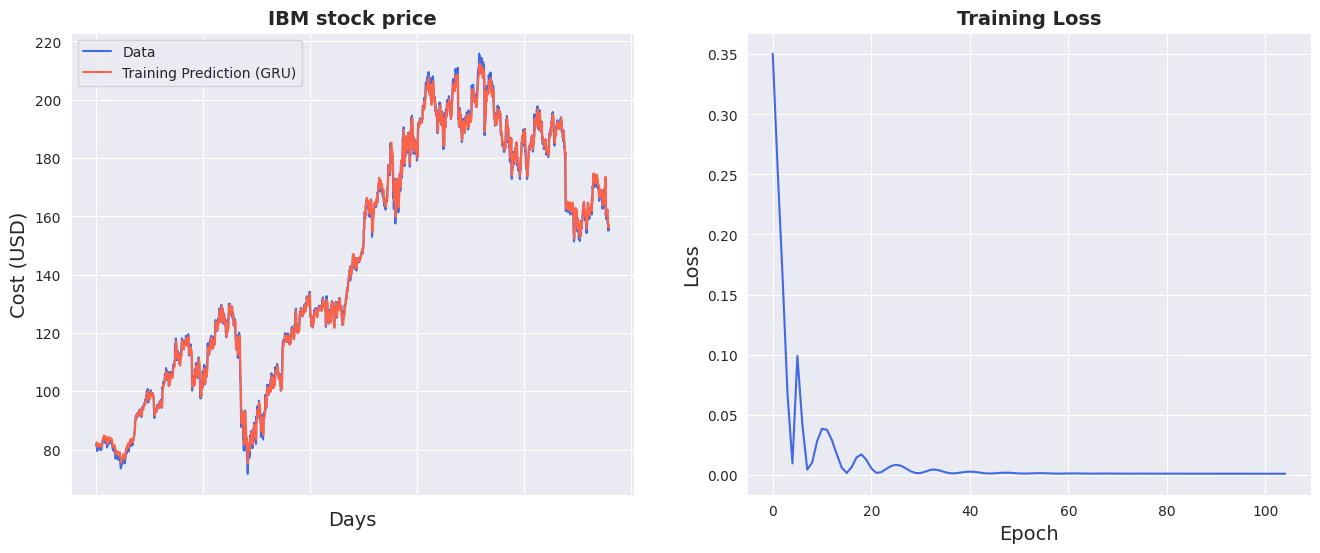

In [125]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('IBM stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [126]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)


Train Score: 2.02 RMSE
Test Score: 1.92 RMSE


In [127]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_ibm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_ibm)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_ibm)-1, :] = y_test_pred

original = scaler.inverse_transform(price_ibm['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [128]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='IBM Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

Microsoft

In [129]:
price_microsoft = data_microsoft[['Close']]
price_microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 23.7 KB


In [130]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_microsoft['Close'] = scaler.fit_transform(price_microsoft['Close'].values.reshape(-1,1))

<ipython-input-130-309fabc410c2>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_microsoft, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [132]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [133]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [134]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [135]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.27300727367401123
Epoch  1 MSE:  0.05094793438911438
Epoch  2 MSE:  0.08020048588514328
Epoch  3 MSE:  0.06394843757152557
Epoch  4 MSE:  0.027629615738987923
Epoch  5 MSE:  0.028448406606912613
Epoch  6 MSE:  0.0404762327671051
Epoch  7 MSE:  0.04446087032556534
Epoch  8 MSE:  0.0389561802148819
Epoch  9 MSE:  0.029371896758675575
Epoch  10 MSE:  0.021646950393915176
Epoch  11 MSE:  0.019795283675193787
Epoch  12 MSE:  0.023520920425653458
Epoch  13 MSE:  0.027194947004318237
Epoch  14 MSE:  0.025383926928043365
Epoch  15 MSE:  0.019376134499907494
Epoch  16 MSE:  0.014222762547433376
Epoch  17 MSE:  0.012635543942451477
Epoch  18 MSE:  0.013589313253760338
Epoch  19 MSE:  0.014353127218782902
Epoch  20 MSE:  0.012808341532945633
Epoch  21 MSE:  0.008832387626171112
Epoch  22 MSE:  0.004577625077217817
Epoch  23 MSE:  0.0032105313148349524
Epoch  24 MSE:  0.005041304510086775
Epoch  25 MSE:  0.005022467114031315
Epoch  26 MSE:  0.0016594510525465012
Epoch  27 MSE:  0.

In [136]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

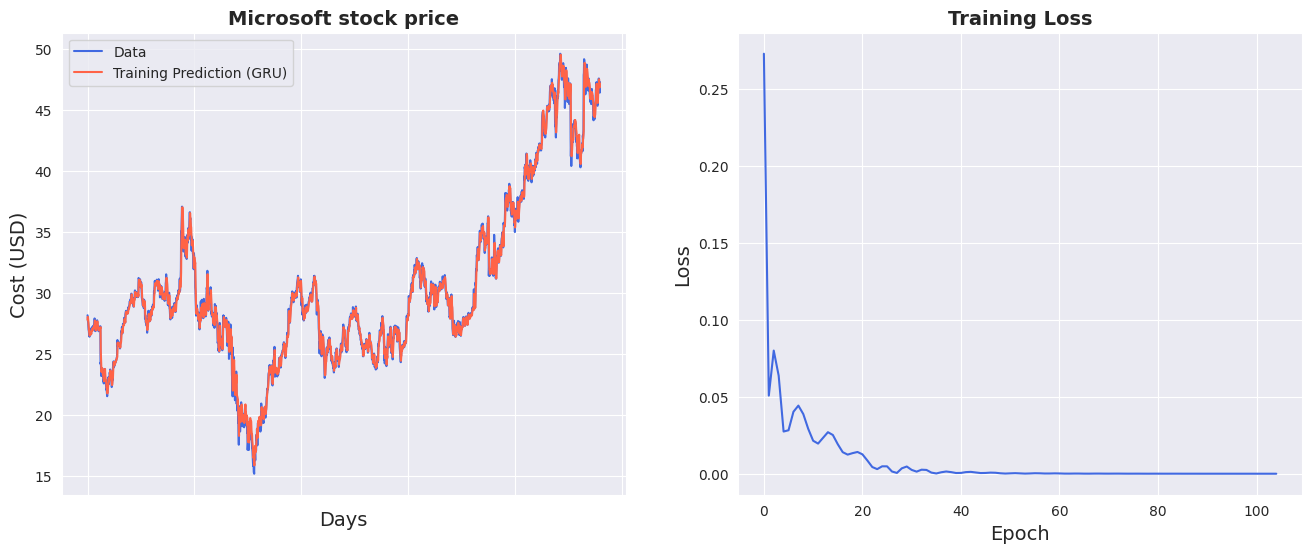

In [137]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Microsoft stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [138]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 0.54 RMSE
Test Score: 2.36 RMSE


In [139]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_microsoft)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_microsoft)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_microsoft)-1, :] = y_test_pred

original = scaler.inverse_transform(price_microsoft['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [140]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Microsoft Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()